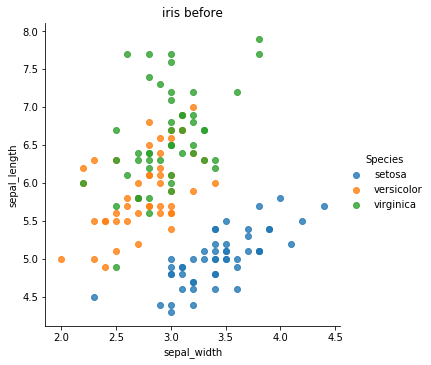

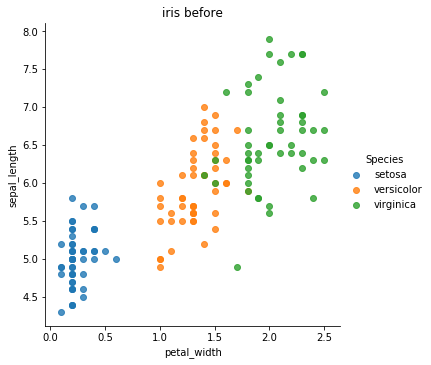

      sepal_length sepal_width petal_length petal_width
count      150.000     150.000      150.000     150.000
mean        -0.000      -0.000       -0.000      -0.000
std          1.003       1.003        1.003       1.003
min         -1.870      -2.434       -1.568      -1.447
25%         -0.901      -0.592       -1.227      -1.184
50%         -0.053      -0.132        0.336       0.133
75%          0.675       0.559        0.763       0.791
max          2.492       3.091        1.786       1.712
(75, 4)
(75,)
(75, 4)
(75,)
96.0


'Done'

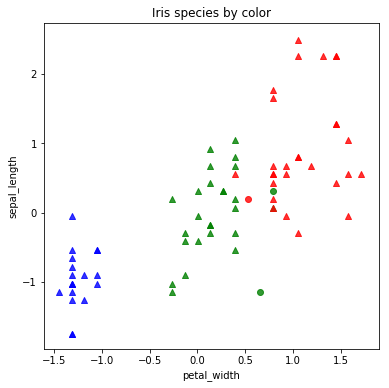

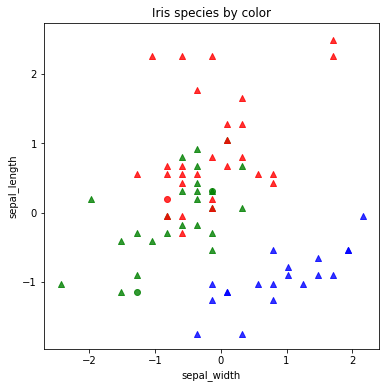

In [15]:
import pandas as pd
from sklearn import datasets
iris=datasets.load_iris()
species=[iris.target_names[x] for x in iris.target]
iris=pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
iris['Species']= species
#print(iris)

iris.dtypes
iris.count()


iris['count'] = 1
iris[['Species', 'count']].groupby('Species').count()


%matplotlib inline
def plot_iris_b4(iris, col1, col2,):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x=col1,y=col2,data=iris,hue='Species',fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('iris before')
    plt.show()
plot_iris_b4(iris, 'sepal_width', 'sepal_length')
plot_iris_b4(iris, 'petal_width', 'sepal_length')



from sklearn.preprocessing import scale
import pandas as pd
num_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_scaled=scale(iris[num_cols])
iris_scaled=pd.DataFrame(data=iris_scaled,columns=[num_cols])
print(iris_scaled.describe().round(3))


levels={'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species']=[levels[x] for x in iris['Species']]
iris_scaled.head()


from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

from sklearn.neighbors import KNeighborsClassifier
KNN_mod= KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)



iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
#print(iris_test)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
#print(iris_test)
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)



levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'petal_width', 'sepal_length', markers, colors)
plot_shapes(iris_test, 'sepal_width', 'sepal_length', markers, colors)